<a href="https://colab.research.google.com/github/Darshan2104/PlayWithPytorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch = 10 , loss = 2539.3826
epoch = 20 , loss = 1168.3718
epoch = 30 , loss = 650.9931
epoch = 40 , loss = 454.4272
epoch = 50 , loss = 379.3604
epoch = 60 , loss = 350.5809
epoch = 70 , loss = 339.5151
epoch = 80 , loss = 335.2509
epoch = 90 , loss = 333.6049
epoch = 100 , loss = 332.9690
epoch = 110 , loss = 332.7229
epoch = 120 , loss = 332.6278
epoch = 130 , loss = 332.5909
epoch = 140 , loss = 332.5766
epoch = 150 , loss = 332.5711
epoch = 160 , loss = 332.5689
epoch = 170 , loss = 332.5681
epoch = 180 , loss = 332.5678
epoch = 190 , loss = 332.5676
epoch = 200 , loss = 332.5676
epoch = 210 , loss = 332.5676
epoch = 220 , loss = 332.5676
epoch = 230 , loss = 332.5676
epoch = 240 , loss = 332.5675
epoch = 250 , loss = 332.5676
epoch = 260 , loss = 332.5675
epoch = 270 , loss = 332.5676
epoch = 280 , loss = 332.5675
epoch = 290 , loss = 332.5675
epoch = 300 , loss = 332.5676


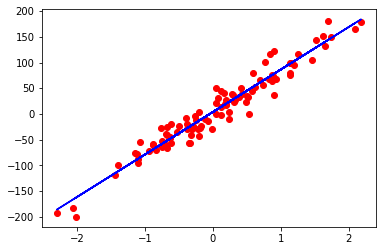

In [19]:
# Pipeline :

# 1.) Design model (input size, output size, forward pass)
# 2.) Construct loss and optimizer
# 3.) Training loop
#     - Forward pass  : compute prediction
#     - Backward pass : Gradients
#     - Update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0.) prepare data

X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(Y_numpy.astype(np.float32)) # only one raw and we want to make it one column vector so we will put each value in row and that makes only one column

y = y.view(y.shape[0], 1) #number of value and only 1 colume #reshape our tensor
n_sample, n_features = X.shape

# 1.) model 
input_size = n_features
output_size = 1         # we have only one value as an output for each example we put in.
model = nn.Linear(input_size, output_size)

# 2.) loss and optimizer
learning_rate=0.03
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3.) training loop
num_epochs = 300

for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0 :
    print(f'epoch = {epoch+1} , loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy() #conveted into numpy
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()